# Work with statistic image text
Version 1

In [1]:
# Files for examples
name_file = '/home/al/Projects_My/NLP-russian-language/examples/recognition_text/creater_array_marked_char/data_set_jpg/sample_stat_1.jpg'
#name_file = '/home/al/MyProjects/NLP-russian-language/examples/recognition_text/creater_array_marked_char/data_set_jpg/sample_stat_2.jpg'

In [2]:
%matplotlib inline
import pytesseract
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import copy
from collections import Counter

In [3]:
def show_image (img):
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.show()

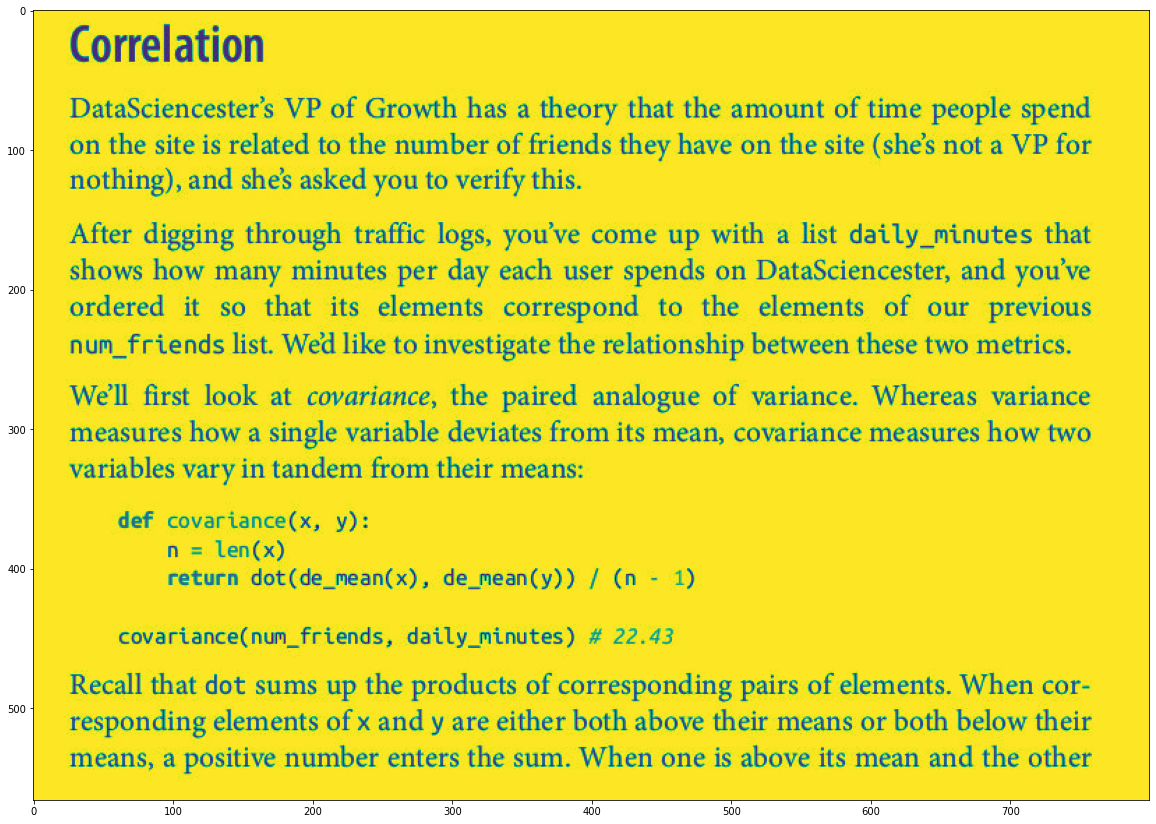

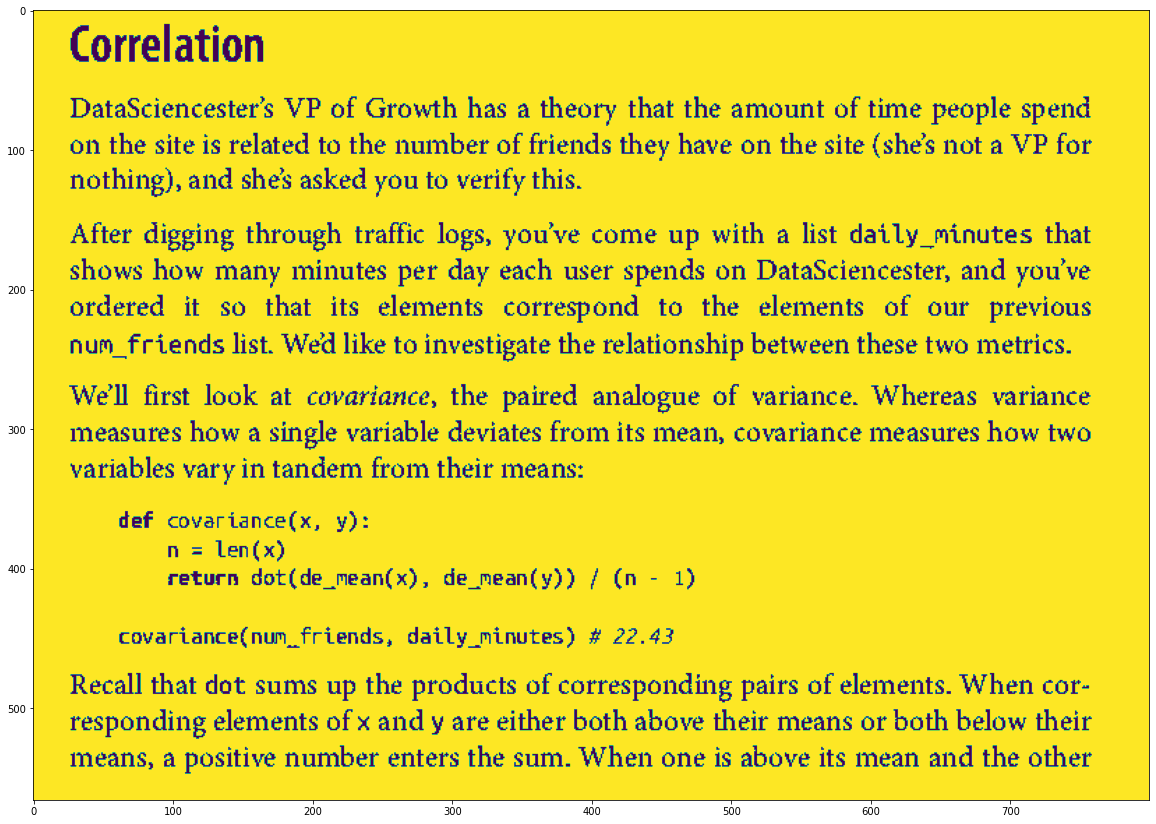

In [4]:
gray = cv2.imread(name_file, 0)
show_image(gray)
#gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
ret, threshold_gray = cv2.threshold(gray, 170, 255, 0)
show_image(threshold_gray)

In [5]:
# building histagramm bright strings image
print(threshold_gray.shape)
max_page = threshold_gray.shape[1]*255
print(max_page)

(566, 800)
204000


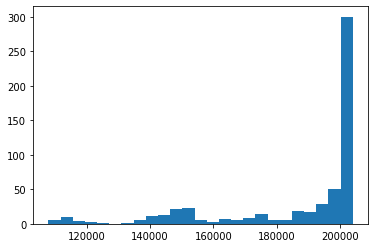

In [6]:
list_hist = []
cc_cc = Counter()
for y_list in range(threshold_gray.shape[0]):
    summ_string = 0
    for x_list in range(threshold_gray.shape[1]):
       summ_string += threshold_gray[y_list, x_list]
    list_hist.append(summ_string)
    cc_cc[summ_string]+=1
plt.hist(list_hist, 25)
plt.show()

In [7]:
median = np.median(np.array(list_hist)) 
print(median)

201322.5


In [8]:
average = np.average(np.array(list_hist)) 
print(average)

187455.1855123675


In [9]:
forse_clear = (median - average)*100/average
print(forse_clear)

7.397669181425553


In [10]:
print(max(list_hist))

204000


In [11]:
forse_clear_2 = (max(list_hist) - median)*100/max(list_hist)
print(forse_clear_2)

1.3125


In [12]:
print(cc_cc[max(list_hist)])

210


In [13]:
print(cc_cc[max(list_hist)]/threshold_gray.shape[0])

0.3710247349823322


In [14]:
def force_clear(name_is_file):
    gray = cv2.imread(name_is_file, 0)
    ret, threshold_gray = cv2.threshold(gray, 170, 255, 0)
    #show_image(threshold_gray)
    com_num_row = threshold_gray.shape[0]
    list_hist = []
    cc_cc = Counter()
    for y_list in range(threshold_gray.shape[0]):
        summ_string = 0
        for x_list in range(threshold_gray.shape[1]):
           summ_string += threshold_gray[y_list, x_list]
        list_hist.append(summ_string)
        cc_cc[summ_string]+=1
    max_page = gray.shape[1]*255
    print('max_page = ', max_page, 'max(list_hist) = ', max(list_hist))
    print()
    return float(cc_cc[max(list_hist)]/com_num_row)

In [15]:
def force_clear_paran(name_is_file, param:int):
    gray_c = cv2.imread(name_is_file, 0)
    ret, threshold_gray_c = cv2.threshold(gray_c, param, 255, 0)
    show_image(threshold_gray_c)
    com_num_row = threshold_gray_c.shape[0]
    list_hist_c = []
    cc_cc_c = Counter()
    for y_list in range(threshold_gray_c.shape[0]):
        summ_string = 0
        for x_list in range(threshold_gray_c.shape[1]):
           summ_string += threshold_gray_c[y_list, x_list]
        list_hist_c.append(summ_string)
        cc_cc_c[summ_string]+=1
    return float(cc_cc_c[max(list_hist_c)]/com_num_row)

max_page =  632400 max(list_hist) =  632400



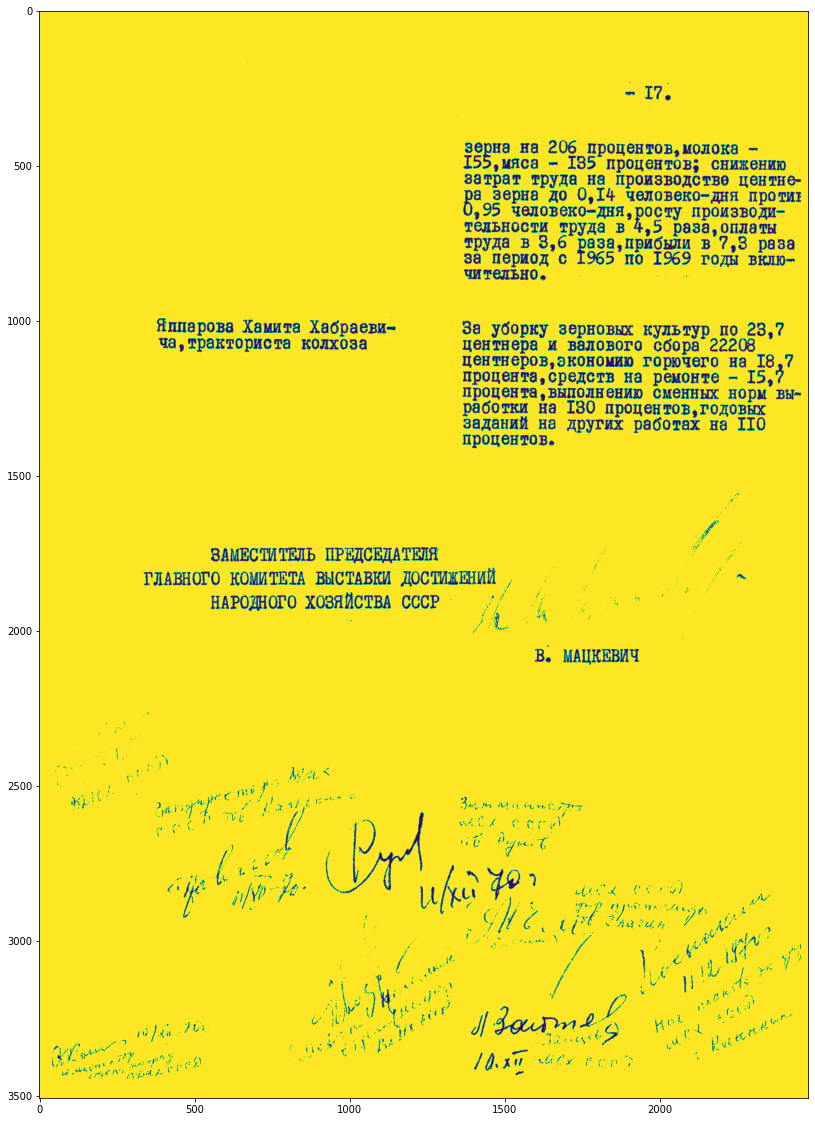

koef =  0.2149985742800114 koef_2 =  0.2919874536641004
max_page =  632400 max(list_hist) =  632400



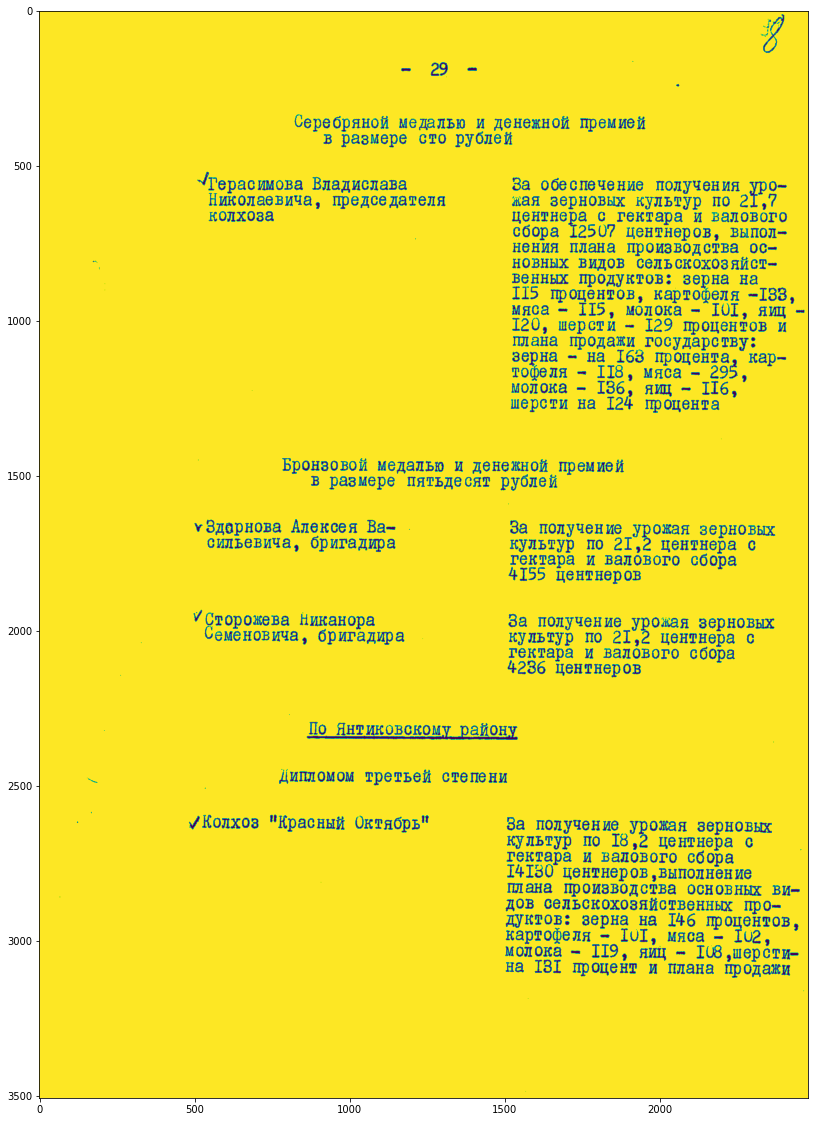

koef =  0.3712574850299401 koef_2 =  0.3712574850299401
max_page =  633675 max(list_hist) =  633675



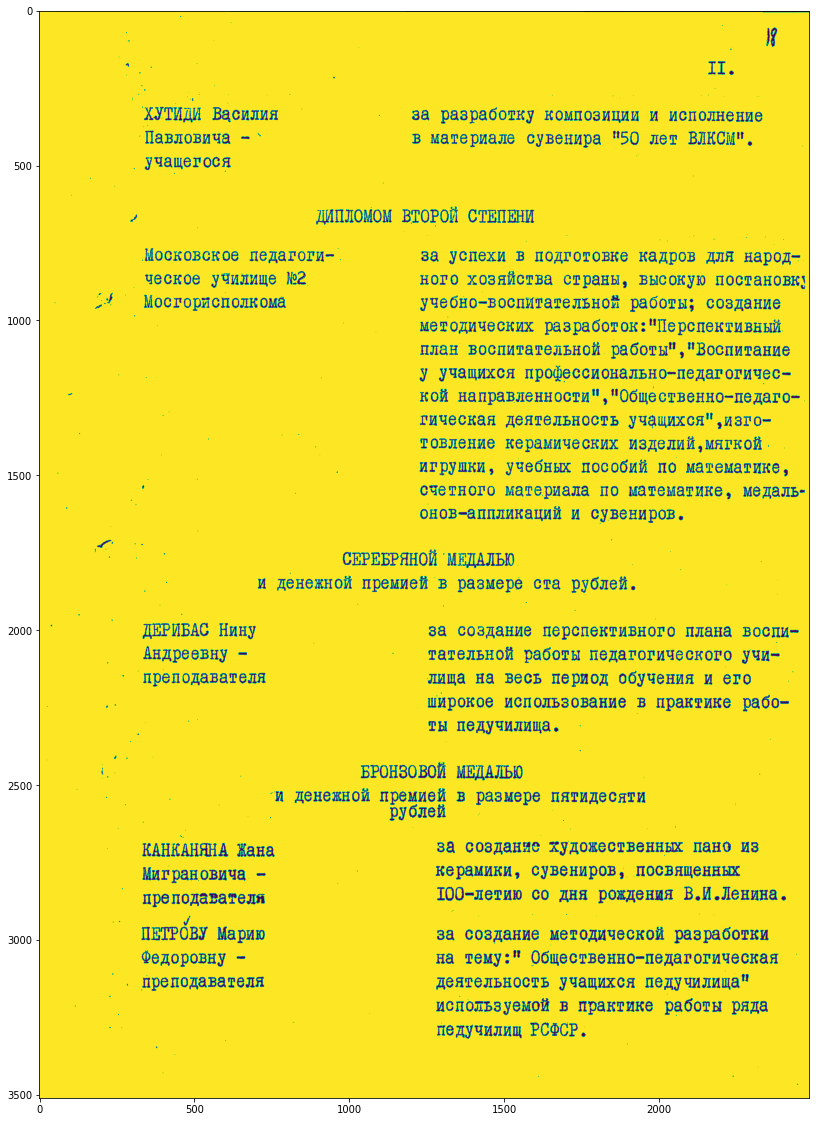

koef =  0.3544159544159544 koef_2 =  0.3544159544159544
max_page =  632400 max(list_hist) =  632400



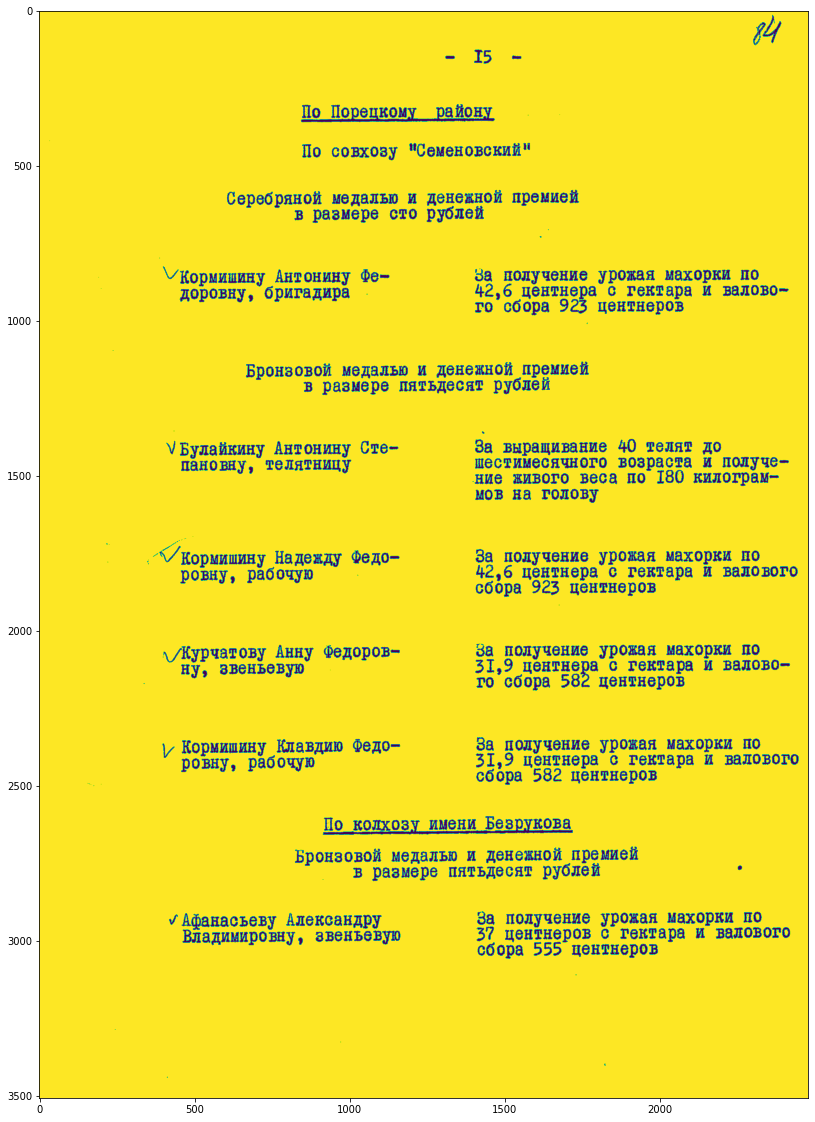

koef =  0.5240946678072427 koef_2 =  0.5240946678072427
max_page =  645915 max(list_hist) =  645915



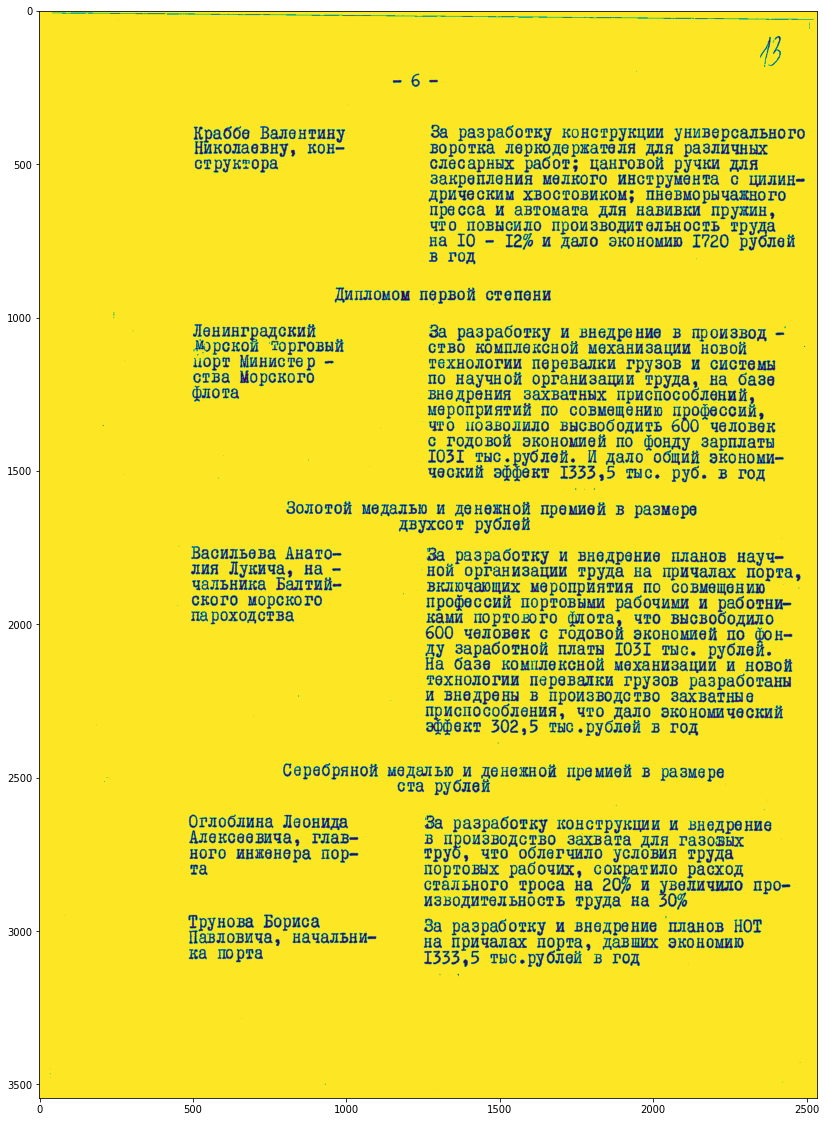

koef =  0.2375846501128668 koef_2 =  0.28414221218961627
max_page =  632400 max(list_hist) =  632400



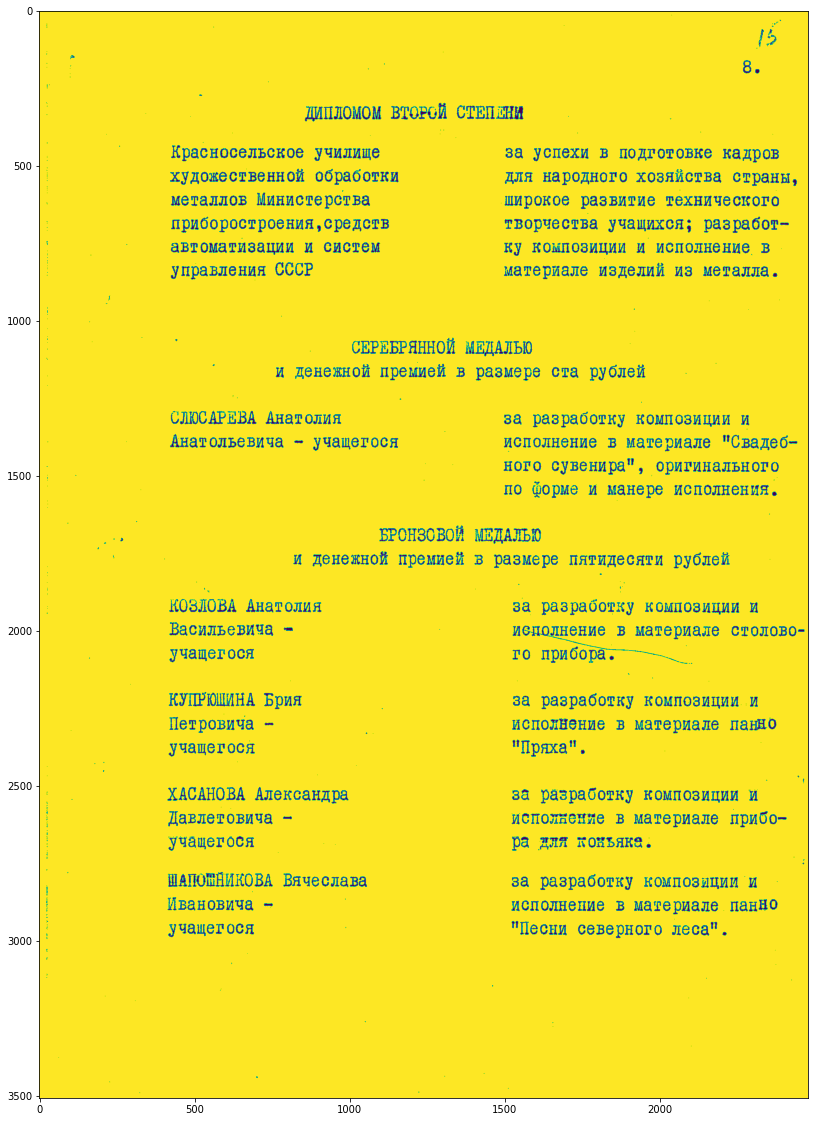

koef =  0.27601938979184487 koef_2 =  0.44026233247790136
max_page =  614295 max(list_hist) =  614295



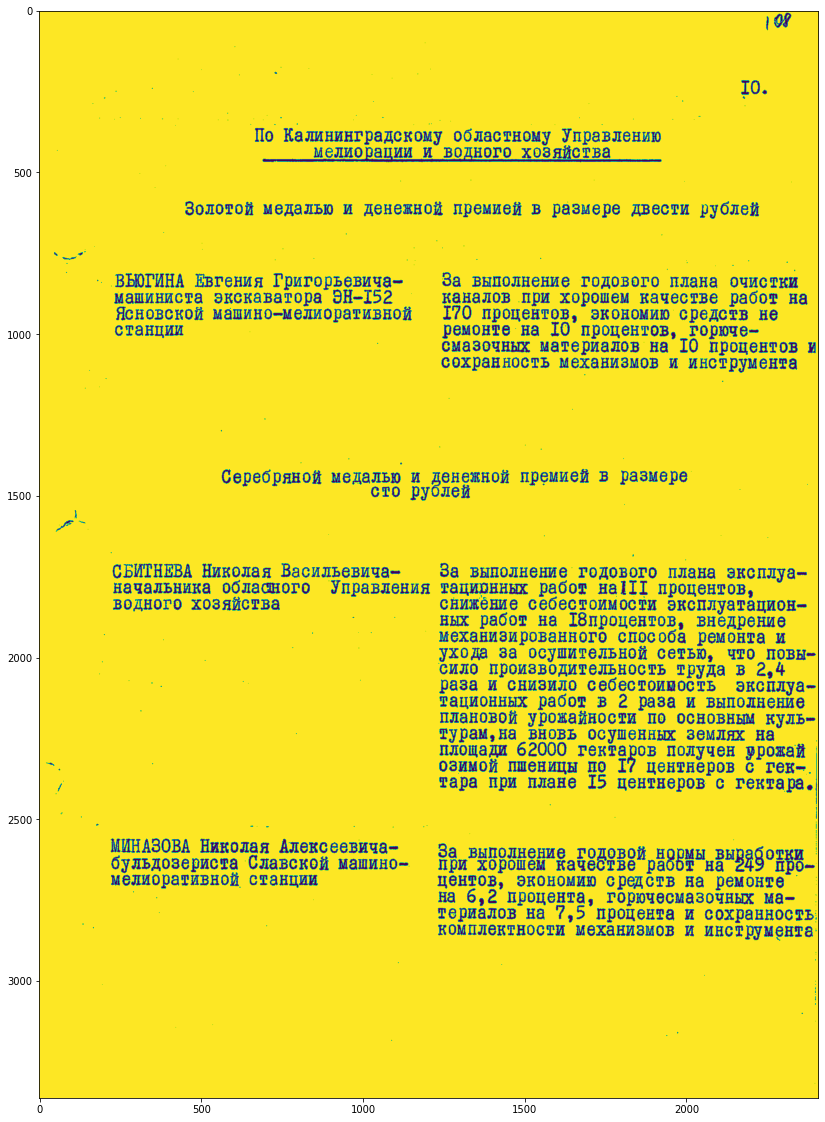

koef =  0.37864366448542536 koef_2 =  0.37864366448542536
max_page =  632400 max(list_hist) =  632400



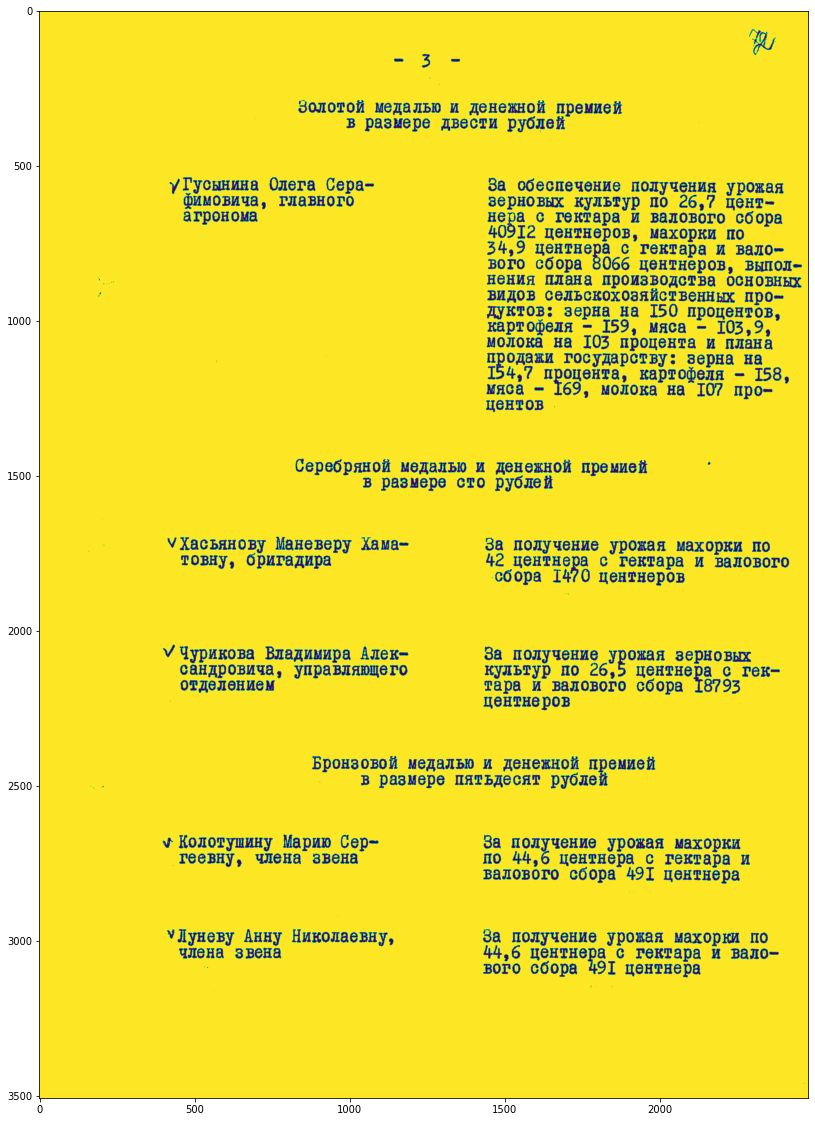

koef =  0.4630738522954092 koef_2 =  0.4630738522954092
max_page =  632400 max(list_hist) =  632400



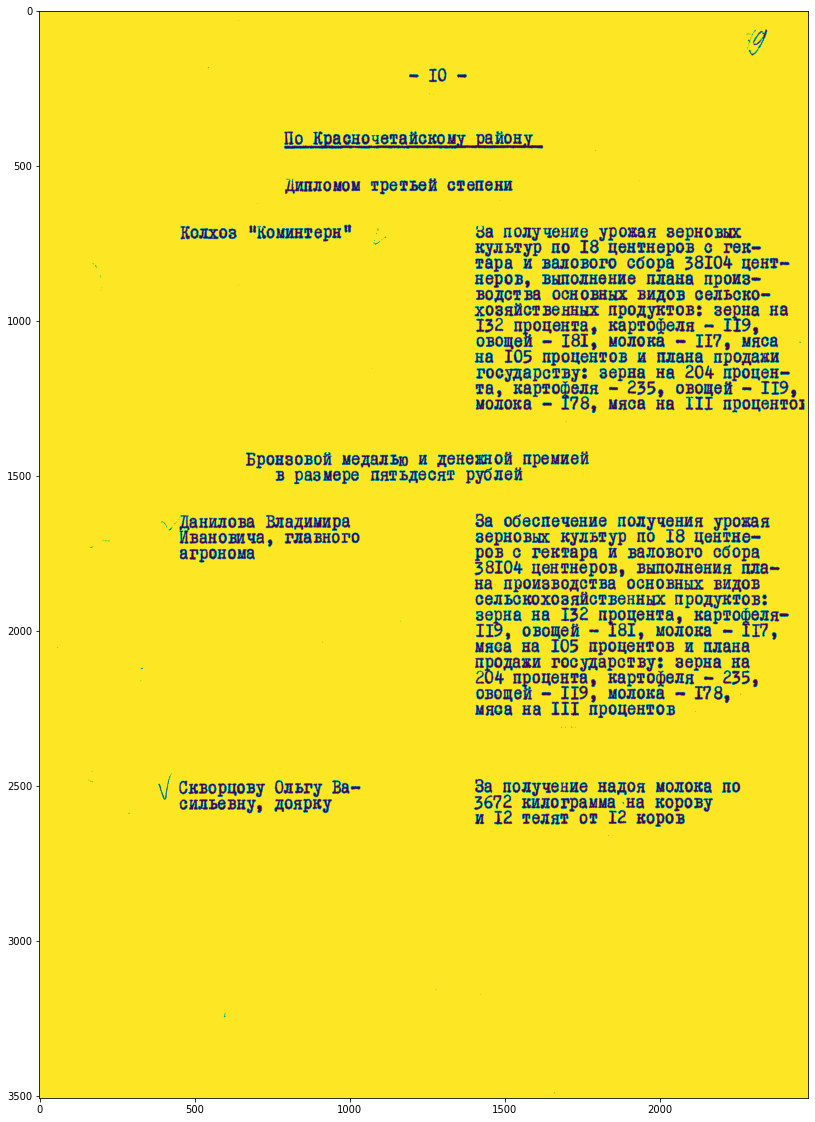

koef =  0.49016253207869975 koef_2 =  0.49016253207869975
max_page =  632400 max(list_hist) =  632400



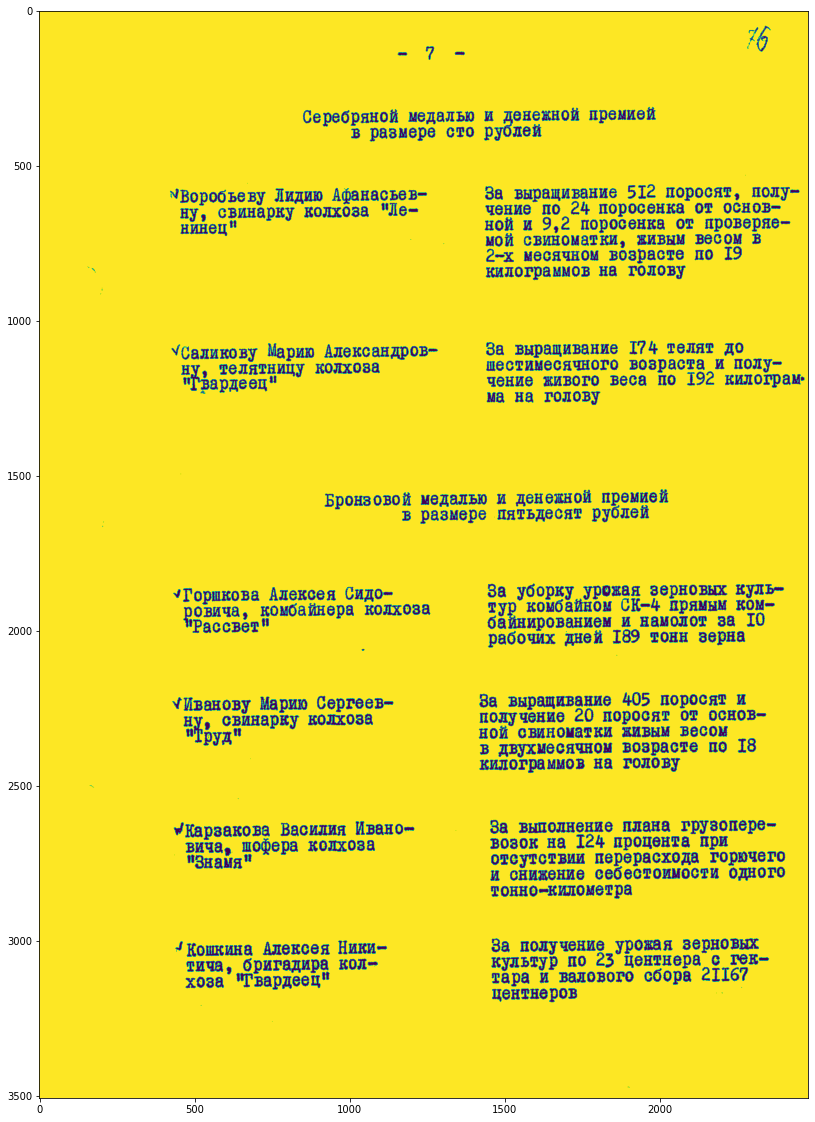

koef =  0.49101796407185627 koef_2 =  0.49101796407185627
max_page =  634185 max(list_hist) =  634185



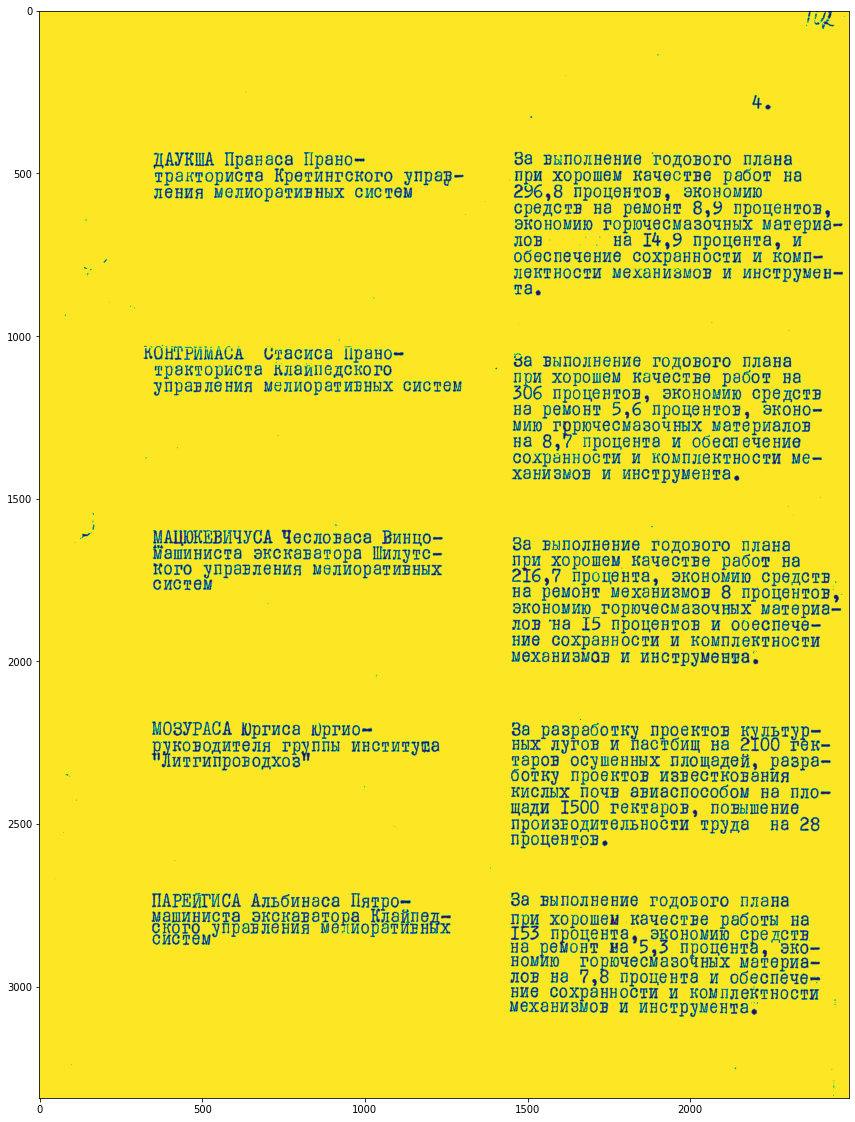

koef =  0.33453022142429684 koef_2 =  0.3393177737881508
max_page =  632400 max(list_hist) =  632400



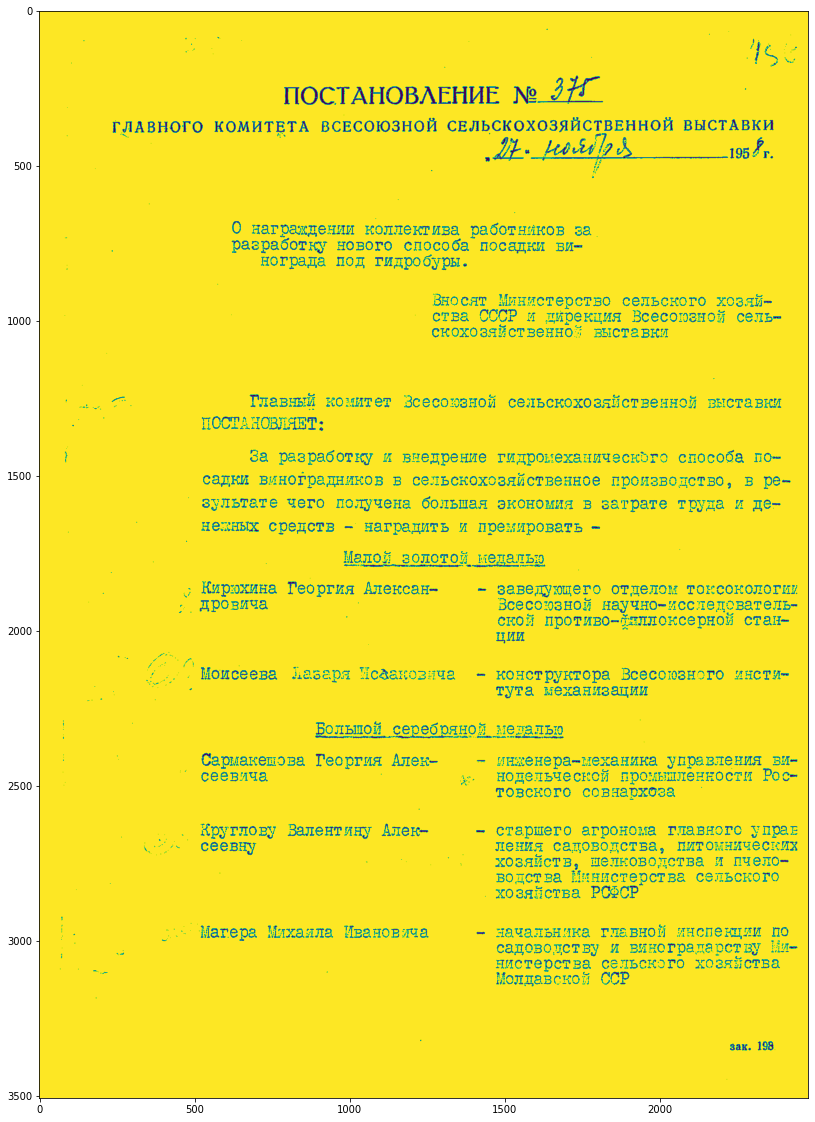

koef =  0.08896492728828058 koef_2 =  0.40975192472198463


In [21]:
import glob
list_files = glob.glob('/home/al/Projects_My/NLP-russian-language/examples/recognition_text/creater_array_marked_char/data_set_jpg/staistc_dirt/*.jpg')
for name_f in list_files:
    koef = force_clear(name_f)
    if koef<0.35:
        param = 170 - int((0.35 -koef)*100*4)
        koef_2 = force_clear_paran(name_f, param)
        print('koef = ', koef, 'koef_2 = ', koef_2)
#     if koef < 0.28 and koef>1.0:
#         koef_2 = force_clear_paran(name_f, 90)
#         print('koef = ', koef, 'koef_2 = ', koef_2)
#     elif koef<1.0:
#         koef_2 = force_clear_paran(name_f, 78)
#         print('koef = ', koef, 'koef_2 = ', koef_2)
    else:
        koef_2 = force_clear_paran(name_f, 170)
        print('koef = ', koef, 'koef_2 = ', koef_2)
        
        